## Replication for "Asymmetry by Design", October 21, 2020
### By Adam Goldstein and Charlie Eaton

### Figure A1: Total degrees and certificates conferred by degree field

In [1]:
ssc install gr0070

In [2]:
copy "https://github.com/HigherEdData/asymmetry/raw/master/data/d_unitidasymmetry.dta" data/d_unitidasymmetry.dta, replace

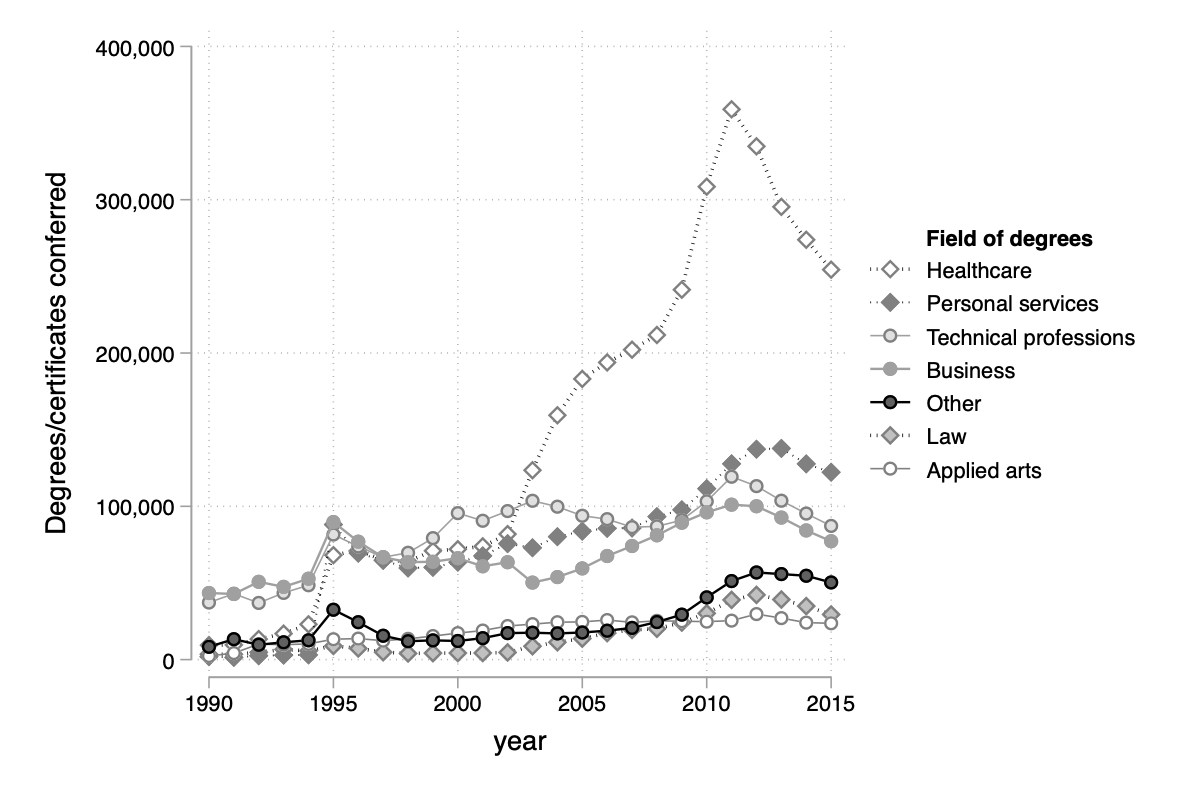

In [3]:
quietly {
set scheme plotplain
est clear

quietly use data/d_unitidasymmetry, clear

collapse (rawsum) type_health type_law type_culinarycosmetic type_arts type_tech type_biz type_other ///
, by (year)

drop if year>2015 | year<1990

label var type_health "Healthcare"
label var type_law "Law"
label var type_culinarycosmetic "Personal services"
label var type_arts "Applied arts"
label var type_tech "Technical professions"
label var type_biz "Business"
label var type_other "Other"

graph tw (connect type* year, sort msym(D D D O O O O O) ///
	mc(gs8 gs8 gs8 gs8 gs8 gs10 black black) ///
	mfc(white gs12 gs8 white gs14 gs10 gs6 black) ///
	lp(dot dot dot l l l l l) lc(black black black gs8 gs10 gs10 black black) ///
	lw(medthick medthick medthin thin thin)), ///
	legend(size(small) pos(3) order(1 3 5 6 7 2 4) ///
	subtitle("{bf:Field of degrees}", size(small))) ///
	ytitle("Degrees/certificates conferred") ylabel(,format(%10.0fc)) ///
	name(degreefieldtime, replace) xlab(1990(5)2015)
    
graph export figures/fa1_asymmetrydegreesfield.pdf, replace
}